## Data Scrapping from Twitter

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stop = stopwords.words("english")

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tweepy'

In [ ]:
consumer_key = 'l4naPaPXapU9FXYzoJc4ITEeE'
consumer_secret = 'LCe8sYQKbYfT44W5hGVaYXUjsvrpoESJde6do1JVf3IBNBh7Yy'
access_token = '2527165958-5WMskbNU6rmNDQgHzhV0Ia8raELTBOz3BhlGEnM'
access_secret = 'LujtjvqeyFutw40JHQ6g5AmhIFghYYy8aqjXYYMYQIb9Q'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [5]:
def get_users(twitterNewsChannels):
    
    usersFromTweets = pd.DataFrame(columns = ["ActiveNewsReaders","Popularity", "Verified","totalTweets"])
    numberOfUsersMined = 0
    
    for newsChannel in twitterNewsChannels:
        for tweet in api.user_timeline(screen_name = newsChannel, count=10):
            for reTweet in api.retweets(tweet.id):
                
                usersFromTweets.loc[numberOfUsersMined, "ActiveNewsReaders"] = reTweet.user.screen_name
                
                if(reTweet.user.friends_count == 0):
                    usersFromTweets.loc[numberOfUsersMined, "Popularity"] = reTweet.user.followers_count
                else:
                    usersFromTweets.loc[numberOfUsersMined, "Popularity"] = reTweet.user.followers_count/reTweet.user.friends_count
                
                usersFromTweets.loc[numberOfUsersMined, "Verified"] = reTweet.user.verified
                usersFromTweets.loc[numberOfUsersMined, "totalTweets"] = reTweet.user.statuses_count
                
                numberOfUsersMined = numberOfUsersMined + 1
    
    return usersFromTweets

In [6]:
NewsChannelsUsernames = ["nytimes","business","washingtonpost"]
usersData = get_users(NewsChannelsUsernames)

NameError: name 'api' is not defined

In [7]:
usersData.head()

NameError: name 'usersData' is not defined

In [ ]:
usersData.shape

In [2]:
usersData.drop_duplicates(inplace = True)
usersData.shape

NameError: name 'usersData' is not defined

In [3]:
usersData.Popularity.max()

NameError: name 'usersData' is not defined

In [ ]:
usersData = usersData[(usersData.totalTweets > 10) & (usersData.Popularity > 1)]
usersData.shape

(78, 4)

In [ ]:
usersData = usersData.reset_index(drop=True)

In [ ]:
def getTweets(user):
    twitterUser = api.get_user(user)
    
    tweets = api.user_timeline(screen_name = user, count = 10,tweet_mode='extended')
    tentweets = []
    for tweet in tweets:
        if tweet.full_text.startswith("RT @") == True:
            tentweets.append(tweet.retweeted_status.full_text)
        else:
            tentweets.append(tweet.full_text)
       
    return tentweets

In [ ]:
usersData["tweets"] = None

for i in range(len(usersData)):
    usersData.loc[i, "tweets"] = getTweets(usersData.ActiveNewsReaders[i])

In [ ]:
usersData.head(10)

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets
0,deduped_nytimes,237.5,False,114191,[The Supreme Court heard arguments on allowing...
1,Papalizie,5.45085,False,228320,[The Supreme Court is hearing arguments about ...
2,tamaplo,2.87481,False,13420,"[Wait, what? The Cannondale DH prototype is no..."
3,desertgardens,1.46277,False,161359,[This should be interesting. https://t.co/IbTg...
4,anblanx,3.82115,True,80140,[Exclusive from @JoshNBCNews Democratic rivals...
5,slimchick1900,5.79524,False,411325,"[A year ago today, the #YongeStreetTragedy van..."
6,chereselw,1.0043,False,28328,[Photos from Sri Lanka: Mass funerals began on...
7,Elizabeth_McLau,9.53472,True,9289,[Photos from Sri Lanka: Mass funerals began on...
8,tsehaik,1.01502,False,45457,[Many musical styles around the world have bee...
9,MujMash,35.3033,True,29167,[Photos from Sri Lanka: Mass funerals began on...


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sohil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def processTweets(tweets):
    
    #cleaning of tweets
    cleanedTweets = []
    for tweet in tweets:
        tw = re.sub('http\S+', '', tweet) #remove links
        tw = re.sub('RT', '', tw) #remove RT of retweet
        tw = re.sub('@[^\s]+','',tw) #remove usernames 
        tw = "".join([char for char in tw if char not in string.punctuation]) #remove punctuations
        tw = tw.lower() #converting to lowercase letters
        tw = ' '.join([word for word in tw.split() if word not in (stop)]) #removing stop words
        tw = ' '.join([word for word in tw.split() if len(word)>1])
        cleanedTweets.append(tw)

    cleanedTweets = ' '.join(cleanedTweets) #joining all tweets
    
    #tokenization
    ProcessedTweets = word_tokenize(cleanedTweets)
    
    ProcessedTweets = [word for word in ProcessedTweets if len(word)>1]
    
    #stemming
    ProcessedTweets = [ps.stem(word) for word in ProcessedTweets]
    
    #lammitization
    ProcessedTweets = [wn.lemmatize(word) for word in ProcessedTweets]
    
    ProcessedTweets = ' '.join(w for w in ProcessedTweets if w in words)
    return ProcessedTweets
        

In [ ]:
for i in range(len(usersData)):
    usersData.loc[i, "tweets"] = processTweets(usersData.tweets[i])

In [ ]:
usersData.head(10)

,ActiveNewsReaders,Popularity,Verified,totalTweets,tweets
0,deduped_nytimes,237.5,False,114191,court argument allow citizenship question majo...
1,Papalizie,5.45085,False,228320,court hear argument whether next ask respond u...
2,tamaplo,2.87481,False,13420,wait open two shock hit link learn use jacket ...
3,desertgardens,1.46277,False,161359,interest great group guy court hear argument w...
4,anblanx,3.82115,True,80140,democrat rival group spent year opposit resear...
5,slimchick1900,5.79524,False,411325,year ago today van attack left shaken victim l...
6,chereselw,1.0043,False,28328,photo sri mass nation day mourn struck two wit...
7,Elizabeth_McLau,9.53472,True,9289,photo sri mass nation day mourn let know work ...
8,tsehaik,1.01502,False,45457,mani music style around world built vocal expr...
9,MujMash,35.3033,True,29167,photo sri mass nation day mourn overhead group...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1,
                                 use_idf=True)

In [ ]:

tfidf_matrix = tfidf_vectorizer.fit_transform(usersData.tweets)

In [ ]:
tfidf_matrix

<78x133 sparse matrix of type '<class 'numpy.float64'>'
	with 1607 stored elements in Compressed Sparse Row format>

In [ ]:
terms = tfidf_vectorizer.get_feature_names()

In [ ]:
tfidf_matrix.toarray()

array([[0.12389299, 0.12004272, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.14464742,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [ ]:
dist

array([[ 1.11022302e-16,  6.18357304e-01,  5.91914904e-01, ...,
         7.93835689e-01,  9.02010857e-01,  8.53917153e-01],
       [ 6.18357304e-01,  0.00000000e+00,  3.93503832e-01, ...,
         8.42002128e-01,  9.05191118e-01,  8.56448065e-01],
       [ 5.91914904e-01,  3.93503832e-01, -2.22044605e-16, ...,
         8.08041297e-01,  9.27641002e-01,  8.21405785e-01],
       ...,
       [ 7.93835689e-01,  8.42002128e-01,  8.08041297e-01, ...,
        -2.22044605e-16,  7.43760077e-01,  4.85372634e-01],
       [ 9.02010857e-01,  9.05191118e-01,  9.27641002e-01, ...,
         7.43760077e-01,  0.00000000e+00,  7.37412080e-01],
       [ 8.53917153e-01,  8.56448065e-01,  8.21405785e-01, ...,
         4.85372634e-01,  7.37412080e-01,  2.22044605e-16]])

In [ ]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names(), index = usersData.ActiveNewsReaders)

,actor,allow,also,appear,argument,armor,ask,attack,back,best,...,vote,want,way,week,whether,without,woman,work,would,year
ActiveNewsReaders,,,,,,,,,,,,,,,,,,,,,
deduped_nytimes,0.123893,0.120043,0.000000,0.000000,0.247786,0.128149,0.204914,0.000000,0.120043,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.128149,0.000000,0.113294,0.000000,0.000000,0.000000
Papalizie,0.000000,0.000000,0.000000,0.000000,0.296646,0.000000,0.245321,0.234562,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.306838,0.000000,0.000000,0.000000,0.000000,0.000000
tamaplo,0.000000,0.000000,0.000000,0.000000,0.301665,0.000000,0.249471,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.312029,0.000000,0.000000,0.000000,0.000000,0.000000
desertgardens,0.000000,0.000000,0.000000,0.000000,0.247356,0.000000,0.204558,0.000000,0.000000,0.000000,...,0.232651,0.000000,0.000000,0.000000,0.255854,0.000000,0.226195,0.000000,0.000000,0.000000
anblanx,0.000000,0.000000,0.000000,0.173413,0.173413,0.000000,0.143410,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.179371,0.179371,0.000000,0.000000,0.000000,0.280355,0.150487
slimchick1900,0.000000,0.000000,0.164291,0.000000,0.000000,0.000000,0.000000,0.138118,0.000000,0.000000,...,0.000000,0.000000,0.164291,0.180676,0.000000,0.000000,0.159732,0.000000,0.000000,0.606327
chereselw,0.000000,0.000000,0.356242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164342
Elizabeth_McLau,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154916,0.189831,0.000000,...,0.000000,0.000000,0.184272,0.000000,0.000000,0.000000,0.000000,0.195919,0.000000,0.000000
tsehaik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.230768,0.000000,0.000000,0.000000,0.000000,0.490709,0.000000,0.212917


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 love
 could
 like
 come
 right
 woman
 say
 new
 hear
 vote
Cluster 1:
 sri
 death
 kill
 bomb
 first
 church
 one
 claim
 state
 mani
Cluster 2:
 de
 la
 en
 un
 chang
 sri
 video
 male
 throne
 armor
Cluster 3:
 trump
 impeach
 return
 name
 may
 republican
 court
 elect
 ask
 like
Cluster 4:
 sri
 time
 year
 attack
 last
 need
 even
 via
 way
 mourn


In [ ]:
titles = usersData.ActiveNewsReaders

In [ ]:
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4'}

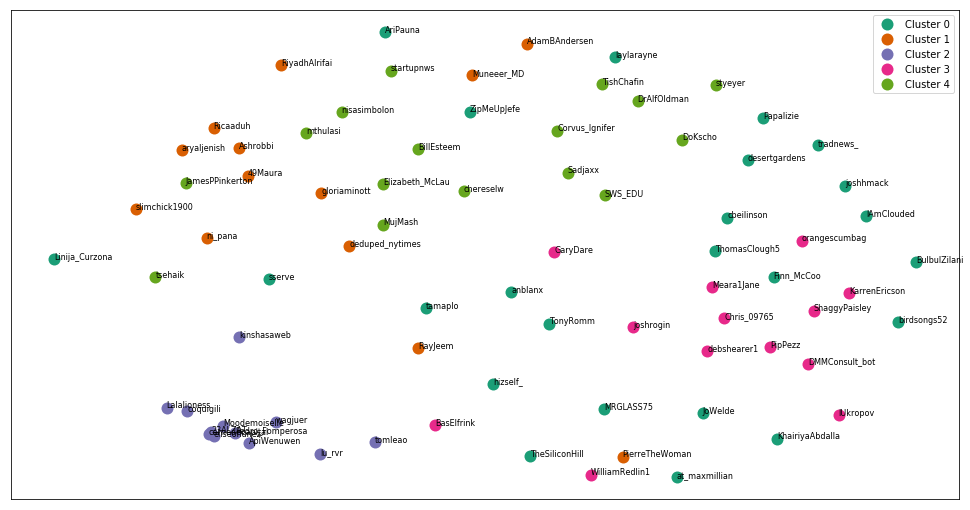

In [ ]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles.values)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1) 
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show()
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## Ward Clustering

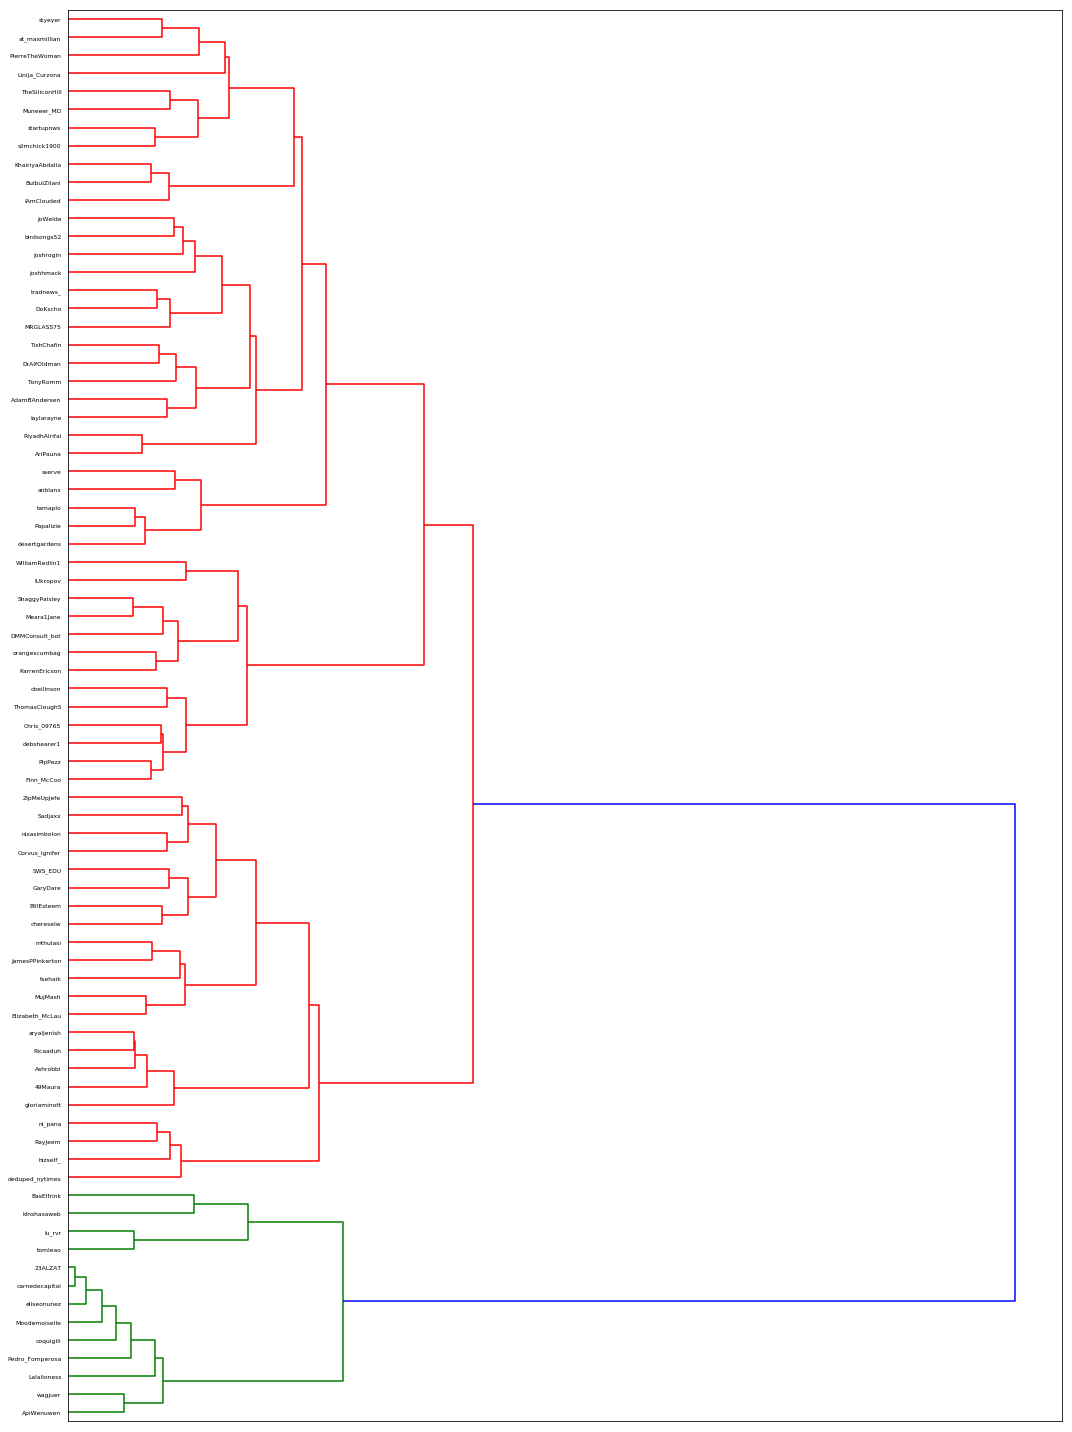

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles.values);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
#creating dataframe for tweets based on clustering results
usersData['cluster']=df.label


In [ ]:
# Import required packages
import logging
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

C:\Users\Sohil\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# I am cleaning it from scratch as I built this earlier and am using N-grams
from numpy import array
from nltk.corpus import stopwords 
from gensim.corpora.dictionary import Dictionary
import string
# Convert to array
docs =array(usersData['tweets'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    #Remove stopwords
    docs = [[token for token in doc if token not in stop] for doc in docs]
    
    #Remove punctuation
    docs = [[token for token in doc if token not in exclude] for doc in docs]

    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 53
Number of documents: 78
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [ ]:
usersData['corpus']=corpus
usersData['docs']=docs
#create unique list of names
UniqueNames = usersData['cluster'].unique()

#create a data frame dictionary to store data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
docscluster={elem : pd.DataFrame for elem in UniqueNames}
corpuscluster={elem : pd.DataFrame for elem in UniqueNames}
dictionarycluster={elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = usersData[:][usersData.cluster == key]
    docscluster[key]=usersData['docs'][usersData.cluster == key]
    corpuscluster[key]=usersData['corpus'][usersData.cluster == key]
    dictionarycluster[key]=Dictionary(docscluster[key])

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\users\\Lenovo\\AppData\\Local\\Temp\\mallet-2.0.8'

mallet_path = 'C:\\users\\Lenovo\\AppData\\Local\\Temp\\mallet-2.0.8\\bin\\mallet'
ldamallet = LdaMallet(mallet_path,corpus=corpus,id2word=dictionary,iterations=30)
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = "/mallet-2.0.8/bin/mallet" # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=dictionary)

In [ ]:
import pprint
# Show Topics
#pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.2896267584835114


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:ocs
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list={elem : pd.DataFrame for elem in UniqueNames }
coherence_values={ elem : pd.DataFrame for elem in UniqueNames}
for i in np.arange(num_clusters):
    model_list[i], coherence_values[i] = compute_coherence_values(dictionary=dictionarycluster[i], corpus=corpuscluster[i], texts=docscluster[i], start=2, limit=6, step=1)

In [ ]:
# Print the coherence scores
import math
best_value=np.array([])
optimal_model={elem : pd.DataFrame for elem in UniqueNames }
for i in np.arange(num_clusters):
    coherence_values[i]=[value for value in coherence_values[i] if not math.isnan(value)]
    best_value=np.append(best_value, np.amax(coherence_values[i])) 
    t=int(np.argmax(coherence_values[i]))
    optimal_model[i]=model_list[i][t]
    print(t)
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

0
0
3
0
0


In [ ]:
coherence_values

{1: [0.8057706220605096,
  0.3625554269043237,
  0.20325571644416968,
  0.3193106708446687],
 0: [0.4313127413425586,
  0.3764788842565867,
  0.2857064633346968,
  0.3538693133033498],
 4: [0.9440259424554052,
  0.5432069460215748,
  0.3269129343566271,
  0.31172128415285055],
 2: [0.25603909968422167,
  0.4777340174909357,
  0.5131182331076954,
  0.5502659235460794],
 3: [0.6975394200693459,
  0.4002963531689175,
  0.3748821303770391,
  0.4150458017194806]}

In [ ]:
optimal_model[3].train(corpus)

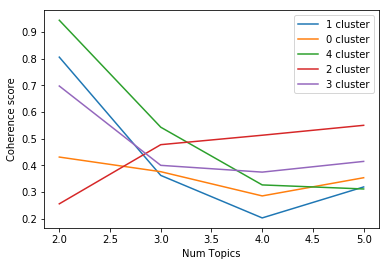

In [ ]:
#x={elem:pd.DataFrame for elem in range(UniqueNames)}
import matplotlib.pyplot as plt
limit=6; start=2; step=1;
x={elem:list(range(start, limit, step)) for elem in (UniqueNames)}
for key in x.keys():
    plt.plot(x[key],coherence_values[key], label= str(key)+ ' cluster') 
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    
plt.legend(loc='best')
plt.show()

## Sentiment Analysis

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [ ]:
polaritycluster={elem : pd.DataFrame for elem in UniqueNames}
subjectivitycluster={elem : pd.DataFrame for elem in UniqueNames}
for i in DataFrameDict.keys():
    polaritycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweets'])).sentiment.polarity
    subjectivitycluster[i]=TextBlob(' '.join(DataFrameDict[i]['tweets'])).sentiment.subjectivity


In [ ]:
polaritycluster #polarity of each cluster

{1: 0.16719238874000783,
 0: 0.14965598444765113,
 4: 0.08685632782855007,
 2: 0.09588744588744592,
 3: 0.1129788961038961}

In [ ]:
subjectivitycluster #subjectivity of each cluster

{1: 0.43002181680753104,
 0: 0.48866889797445384,
 4: 0.3727808062993248,
 2: 0.5412729114856774,
 3: 0.4926910473785474}

In [ ]:
lda_model2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model[3])

In [ ]:
 #Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpuscluster[3], dictionary)
vis2

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.300496  0.0       1        1  51.424637
0     -0.300496  0.0       2        1  48.575363, topic_info=     Category       Freq                  Term      Total    loglift  \
term                                                                   
5     Default  16.000000  citizenship_question  16.000000  30.000000   
17    Default  13.000000            republican  13.000000  29.000000   
49    Default   7.000000                 think   7.000000  28.000000   
52    Default  26.000000               impeach  26.000000  27.000000   
25    Default   6.000000              democrat   6.000000  26.000000   
15    Default   6.000000                 never   6.000000  25.000000   
51    Default   6.000000               opinion   6.000000  24.000000   
47    Default   6.000000                  want   6.000000  23.000000   
24    Default   6.000000                  vote   6.000000  22.000000   
4     Default   5.000000           citizenship   5.000000  21.000000   
40    Default   5.000000                 three   5.000000  20.000000   
43    Default   5.000000                 right   5.000000  19.000000   
19    Default   4.000000                  take   4.000000  18.000000   
36    Default   3.000000                 still   3.000000  17.000000   
37    Default   3.000000               support   3.000000  16.000000   
48    Default   3.000000                  make   3.000000  15.000000   
22    Default   3.000000                launch   3.000000  14.000000   
50    Default   3.000000                 thing   3.000000  13.000000   
21    Default   3.000000              campaign   3.000000  12.000000   
26    Default   3.000000                  said   3.000000  11.000000   
18    Default   3.000000                  seem   3.000000  10.000000   
6     Default   2.000000                 could   2.000000   9.000000   
45    Default   2.000000                 share   2.000000   8.000000   
9     Default   2.000000                  hear   2.000000   7.000000   
39    Default   2.000000                public   2.000000   6.000000   
28    Default   2.000000                  year   2.000000   5.000000   
31    Default   2.000000                  must   2.000000   4.000000   
20    Default   1.000000                 woman   1.000000   3.000000   
10    Default   1.000000                  kill   1.000000   2.000000   
38    Default   1.000000                easter   1.000000   1.000000   
...       ...        ...                   ...        ...        ...   
50     Topic2   3.814595                 thing   3.814595   0.722100   
0      Topic2   1.271532                 allow   1.271532   0.722100   
13     Topic2   1.271532                  mani   1.271532   0.722100   
17     Topic2  13.986847            republican  13.986847   0.722100   
20     Topic2   1.271532                 woman   1.271532   0.722100   
28     Topic2   2.543063                  year   2.543063   0.722100   
9      Topic2   2.543063                  hear   2.543063   0.722100   
32     Topic2   1.271532                 today   1.271532   0.722100   
6      Topic2   2.543063                 could   2.543063   0.722100   
38     Topic2   1.271532                easter   1.271532   0.722100   
39     Topic2   2.543063                public   2.543063   0.722100   
43     Topic2   5.086126                 right   5.086126   0.722100   
45     Topic2   2.543063                 share   2.543063   0.722100   
10     Topic2   1.271532                  kill   1.271532   0.722100   
27     Topic2   1.271532                  show   2.401604   0.086100   
33     Topic2   1.271532                  even   2.401604   0.086100   
52     Topic2   5.086126               impeach  26.557499  -0.930700   
1      Topic2   0.000000                  back   0.000000        NaN   
2      Topic2   0.000000                  bomb   0.000000        NaN   
3      Topic2   0

## Scaping nytimes

In [ ]:
import newspaper
from newspaper import Article

In [ ]:
cnn_paper = newspaper.build('https://www.cnn.com/')


C:\Users\Sohil\Anaconda3\lib\site-packages\requests\utils.py:439: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  DeprecationWarning)
C:\Users\Sohil\Anaconda3\lib\site-packages\requests\utils.py:439: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  DeprecationWarning)


In [ ]:
import pandas as pd
cnn_articles=pd.DataFrame()
df_text = pd.DataFrame(columns=['Link','text'])
for article in cnn_paper.articles:
    link = article.url
    try:
        
        article.download()
        article.parse()
        article.nlp()
        article.text
        temp={'Link':link,
              'text':article.text}
        df_text= df_text.append(temp,ignore_index=True)
        
    except:
        pass
    
           
    

C:\Users\Sohil\Anaconda3\lib\site-packages\requests\utils.py:439: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  DeprecationWarning)
C:\Users\Sohil\Anaconda3\lib\site-packages\requests\utils.py:439: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  DeprecationWarning)


In [ ]:
# Perform function on our document
docs = docs_preprocessor(df_text['text'])
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


Number of unique tokens: 249
Number of documents: 103


In [ ]:
pol=[TextBlob(' '.join(df_text.iloc[i,1])).sentiment.polarity for i in range(df_text.shape[0])]
sub=[TextBlob(' '.join(df_text.iloc[i,1])).sentiment.subjectivity for i in range(df_text.shape[0])]
df_text['pol']=pol
df_text['sub']=sub

In [ ]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
      # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords={elem : pd.DataFrame for elem in UniqueNames}
topicss=pd.DataFrame()
for i in range(len(UniqueNames)):
    mod=gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model[i])
    temp={'cluster':i,
         'model':mod}
    topicss=topicss.append(temp, ignore_index=True)
    df_topic_sents_keywords[i] = format_topics_sentences(ldamodel=mod, corpus=corpus, texts=docs)
    df_topic_sents_keywords[i]['Diff']= df_topic_sents_keywords[i]['Perc_Contribution']-np.mean(df_topic_sents_keywords[i]['Perc_Contribution'])
   

In [ ]:
df_topic_sents_keywords

{1:      Dominant_Topic  Perc_Contribution  \
 0               1.0             0.5815   
 1               1.0             0.5717   
 2               1.0             0.5574   
 3               1.0             0.5374   
 4               1.0             0.5192   
 5               1.0             0.5408   
 6               1.0             0.5213   
 7               1.0             0.5187   
 8               1.0             0.5384   
 9               1.0             0.5293   
 10              1.0             0.5237   
 11              1.0             0.6298   
 12              1.0             0.5283   
 13              1.0             0.5283   
 14              1.0             0.5519   
 15              1.0             0.5283   
 16              0.0             0.5000   
 17              1.0             0.6242   
 18              1.0             0.5098   
 19              1.0             0.5098   
 20              0.0             0.5148   
 21              1.0             0.5263   
 22     

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sentiment={elem: pd.DataFrame for elem in UniqueNames}
subjectivit={elem: pd.DataFrame for elem in UniqueNames}
w1=0.8
w2=0.2
for i in range(len(UniqueNames)):
    sentiment[i]=cosine_similarity(np.array(df_text.iloc[:, 2]).reshape(-1, 1),np.array([polaritycluster[i]]).reshape(-1, 1))
    subjectivit[i]=cosine_similarity(np.array(df_text.iloc[:, 2]).reshape(-1, 1),np.array([subjectivitycluster[i]]).reshape(-1, 1))
    df_topic_sents_keywords[i]['Polarity']=sentiment[i]
    df_topic_sents_keywords[i]['Subjectivity']=subjectivit[i]
    df_topic_sents_keywords[i]['Metric']=w1*df_topic_sents_keywords[i]['Diff']+w2/2*(df_topic_sents_keywords[i]['Polarity']+df_topic_sents_keywords[i]['Subjectivity'])


In [ ]:
 df_topic_sents_keywords

{1:      Dominant_Topic  Perc_Contribution  \
 0               1.0             0.5815   
 1               1.0             0.5717   
 2               1.0             0.5574   
 3               1.0             0.5374   
 4               1.0             0.5192   
 5               1.0             0.5408   
 6               1.0             0.5213   
 7               1.0             0.5187   
 8               1.0             0.5384   
 9               1.0             0.5293   
 10              1.0             0.5237   
 11              1.0             0.6298   
 12              1.0             0.5283   
 13              1.0             0.5283   
 14              1.0             0.5519   
 15              1.0             0.5283   
 16              0.0             0.5000   
 17              1.0             0.6242   
 18              1.0             0.5098   
 19              1.0             0.5098   
 20              0.0             0.5148   
 21              1.0             0.5263   
 22     

In [ ]:
recommend=pd.DataFrame()
metric_value=pd.DataFrame()
rec=np.array([])
for i in range(len(docs)):
    for j in range(len(UniqueNames)):
        rec=np.append(rec, df_topic_sents_keywords[j].iloc[i,7])
        
    recommend=recommend.append(pd.Series(np.argmax(rec)),ignore_index=True)
    metric_value=metric_value.append(pd.Series(np.amax(rec)),ignore_index=True)
    rec=np.array([])


In [ ]:
recommend['metric']=metric_value
recommend['url']=df_text['Link']

#np.array([recommend,metric_value])
recommend #0 is cluster group


,0,metric,url
0,3.0,-0.116864,https://www.cnn.com/2019/04/23/business/us-ira...
1,1.0,0.236645,https://www.cnn.com/2019/04/23/business/wells-...
2,1.0,0.225205,https://www.cnn.com/2019/04/23/investing/harle...
3,4.0,0.220569,https://www.cnn.com/2019/04/23/business/london...
4,3.0,0.200096,https://www.cnn.com/2019/04/23/business/boeing...
5,0.0,0.263093,https://www.cnn.com/2019/04/23/tech/twitter-q1...
6,3.0,0.264416,https://www.cnn.com/2019/04/23/tech/facebook-b...
7,2.0,0.201508,https://www.cnn.com/2019/04/23/business/kohls-...
8,3.0,0.255696,https://www.cnn.com/2019/04/23/perspectives/me...
9,4.0,0.202809,https://www.cnn.com/2019/04/23/success/farm-st...
